In [19]:
#This model was made for Myntra WeForShe hackathon 2024
#This model analyzes the style in trend, products sold, category they're popular in.
#This is a Python 3 environment
#It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
#For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [8]:
from google.colab import files
uploaded= files.upload()

Saving MyntraFashion.csv.csv to MyntraFashion.csv (1).csv


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [24]:
data=pd.read_csv(io.BytesIO(uploaded['MyntraFashion.csv (1).csv']))
data.head()

<ipython-input-24-6653271395c9>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(io.BytesIO(uploaded['MyntraFashion.csv (1).csv']))


,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [26]:
data.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [27]:
data.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

In [28]:
data['BrandName'].nunique()

2088

In [29]:
# top 20 Brands

In [30]:
top_brand=data['BrandName'].value_counts().sort_values(ascending=False)
top_brand

BrandName
Pothys                   16005
Roadster                 10935
KALINI                    9589
HERE&NOW                  6515
HRX by Hrithik Roshan     5297
                         ...  
RED CHERI                    1
Mulmul By Arabella           1
SURHI                        1
pink woman                   1
Geonaute By Decathlon        1
Name: count, Length: 2088, dtype: int64

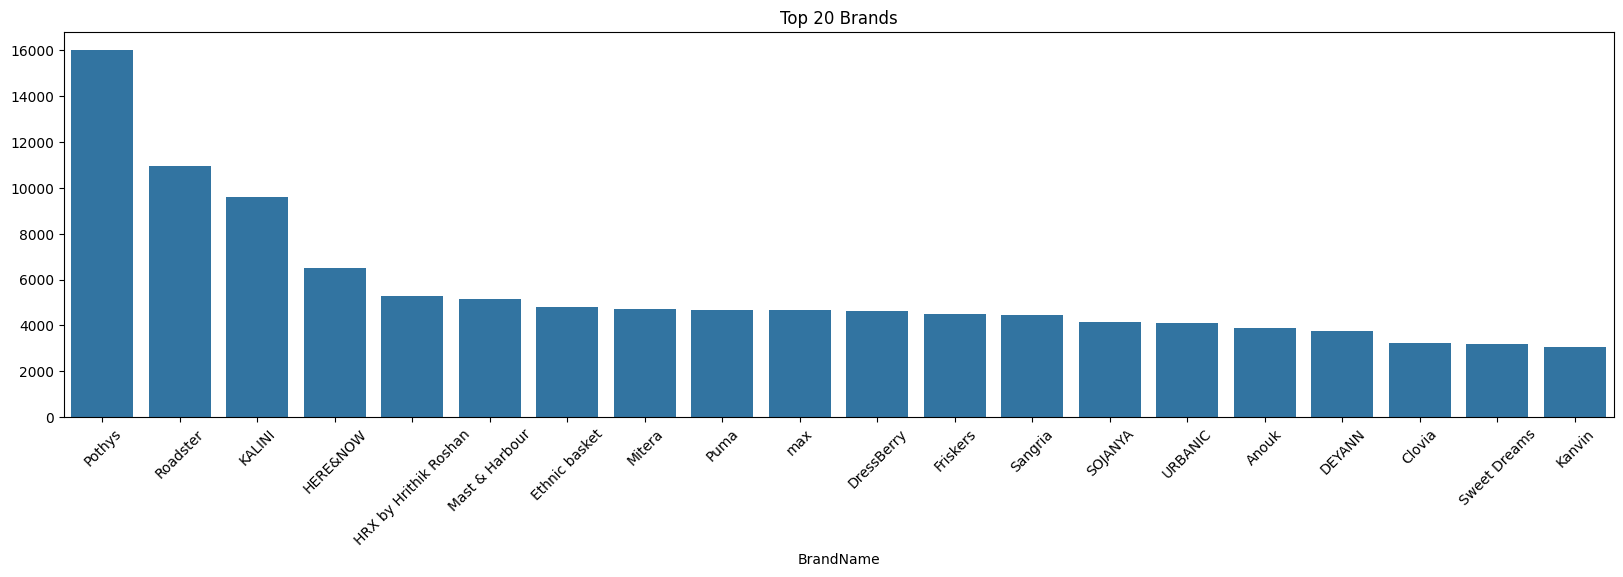

In [31]:

plt.figure(figsize=(20,5))
sns.barplot(x=top_brand.iloc[:20].index,y=top_brand.iloc[:20].values)
plt.xticks(rotation=45)
plt.title("Top 20 Brands")

plt.show()

#Pothy's - silk saree brand was the most sold/popular

In [32]:
data.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

In [33]:
gender_count=data['category_by_Gender'].value_counts()
gender_count

category_by_Gender
Women    339185
Men      187379
Name: count, dtype: int64

<Axes: xlabel='category_by_Gender'>

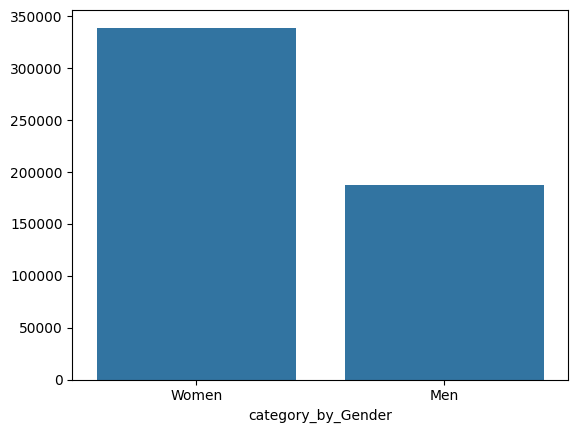

In [34]:
sns.barplot(x=gender_count.index,y=gender_count.values)

In [35]:
data['Category'].nunique()

8

In [36]:
category=data['Category'].value_counts()

In [37]:
category

Category
Indian Wear                 145845
Western                     140992
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: count, dtype: int64

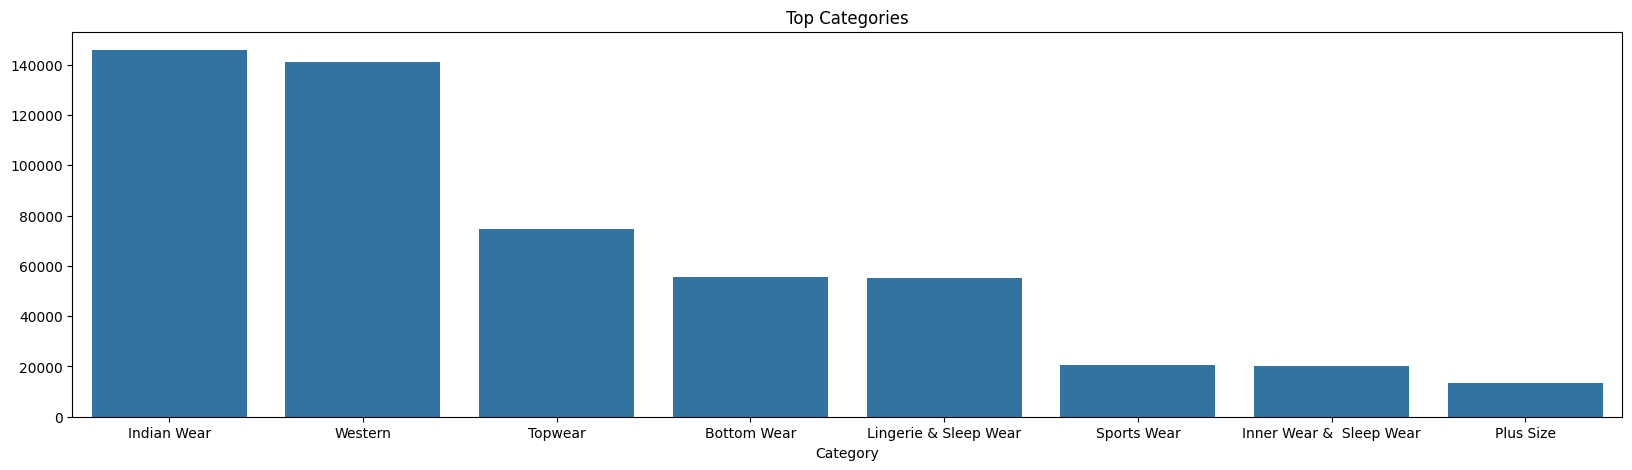

In [38]:
plt.figure(figsize=(20,5))
sns.barplot(x=category.index,y=category.values)
plt.title("Top Categories")
plt.show()

#Indian Wears were the most popular/sold followed by Indian wear

In [39]:
data.head(2)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0


In [40]:
data['OriginalPrice (in Rs)'].nunique()

4914

In [41]:
data['OriginalPrice (in Rs)'].value_counts().sort_values(ascending=False)

OriginalPrice (in Rs)
1999.0    26679
1499.0    21321
999.0     18717
1299.0    16933
2499.0    16491
          ...  
2558.0        1
1573.0        1
3974.0        1
8095.0        1
3583.0        1
Name: count, Length: 4914, dtype: int64

In [42]:
if data['OriginalPrice (in Rs)'].dtype == 'object':
    data['OriginalPrice (in Rs)'] = data['OriginalPrice (in Rs)'].astype(str).str.replace(',', '').astype(float)
if data['DiscountPrice (in Rs)'].dtype == 'object':
    data['DiscountPrice (in Rs)'] = data['DiscountPrice (in Rs)'].astype(str).str.replace(',', '').astype(float)

In [43]:
print(data['OriginalPrice (in Rs)'].isna().sum(), "NaNs in 'OriginalPrice (in Rs)'")
print(data['DiscountPrice (in Rs)'].isna().sum(), "NaNs in 'DiscountPrice (in Rs)'")

# Fill NaN values with a placeholder (e.g., 0) or drop them
data['OriginalPrice (in Rs)'].fillna(0, inplace=True)
data['DiscountPrice (in Rs)'].fillna(0, inplace=True)

# If there are infinite values, replace them as well
data.replace([np.inf, -np.inf], 0, inplace=True)

# Now convert to integers
data['OriginalPrice (in Rs)'] = data['OriginalPrice (in Rs)'].astype(int)
data['DiscountPrice (in Rs)'] = data['DiscountPrice (in Rs)'].astype(int)

0 NaNs in 'OriginalPrice (in Rs)'
193158 NaNs in 'DiscountPrice (in Rs)'


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  526564 non-null  int64  
 8   OriginalPrice (in Rs)  526564 non-null  int64  
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 52.2+ MB


In [45]:
data['DiscountOffer']=(((data['OriginalPrice (in Rs)']-data['DiscountPrice (in Rs)'])/data['OriginalPrice (in Rs)'])*100)

In [46]:
data.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824,1499,45.030020,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517,1149,55.004352,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629,1399,55.039314,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893,1295,31.042471,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,0,599,100.000000,"XS, S, M, L, XL",4.2,999.0


In [47]:
discount_with_brand=data[['DiscountOffer','BrandName']].loc[0:10].sort_values(by='DiscountOffer',ascending=False)
discount_with_brand

,DiscountOffer,BrandName
4,100.000000,Roadster
5,100.000000,Mast & Harbour
7,100.000000,Mayra
8,100.000000,Roadster
9,100.000000,HERE&NOW
6,60.040027,HIGHLANDER
2,55.039314,Roadster
10,55.020378,HRX by Hrithik Roshan
1,55.004352,LOCOMOTIVE
0,45.030020,Roadster


In [48]:
# From above we can see that Highlander and Roadster percentage discount

In [49]:
data.duplicated().sum()

0

In [50]:
data=data.drop_duplicates()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  526564 non-null  int64  
 8   OriginalPrice (in Rs)  526564 non-null  int64  
 9   DiscountOffer          526564 non-null  float64
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 52.2+ MB


In [52]:
data[['BrandName','DiscountPrice (in Rs)']].iloc[:20].sort_values(by='DiscountPrice (in Rs)',ascending=False)

,BrandName,DiscountPrice (in Rs)
10,HRX by Hrithik Roshan,1214
12,Anubhutee,1019
3,Zivame,893
0,Roadster,824
16,Vishudh,696
2,Roadster,629
6,HIGHLANDER,599
1,LOCOMOTIVE,517
15,HIGHLANDER,516
4,Roadster,0


In [53]:
data.head(2)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824,1499,45.030020,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517,1149,55.004352,"S, M, L, XL",4.0,999.0


In [54]:
data.drop(['Individual_category','URL','Product_id'],axis=1,inplace=True)

In [55]:
data.head()

,BrandName,Category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,Roadster,Bottom Wear,Men,roadster men navy blue slim fit mid rise clean...,824,1499,45.030020,"28, 30, 32, 34, 36",3.9,999.0
1,LOCOMOTIVE,Bottom Wear,Men,locomotive men black white solid slim fit tra...,517,1149,55.004352,"S, M, L, XL",4.0,999.0
2,Roadster,Topwear,Men,roadster men navy white black geometric print...,629,1399,55.039314,"38, 40, 42, 44, 46, 48",4.3,999.0
3,Zivame,Lingerie & Sleep Wear,Women,zivame women black saree shapewear zi3023core0...,893,1295,31.042471,"S, M, L, XL, XXL",4.2,999.0
4,Roadster,Western,Women,roadster women white solid v neck pure cotton ...,0,599,100.000000,"XS, S, M, L, XL",4.2,999.0


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
encoder=LabelEncoder()

In [58]:
data['BrandName']=encoder.fit_transform(data['BrandName'])
data['category_by_Gender']=encoder.fit_transform(data['category_by_Gender'])
data['Category']=encoder.fit_transform(data['Category'])

In [59]:
data.head()

,BrandName,Category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,1453,0,0,roadster men navy blue slim fit mid rise clean...,824,1499,45.030020,"28, 30, 32, 34, 36",3.9,999.0
1,937,0,0,locomotive men black white solid slim fit tra...,517,1149,55.004352,"S, M, L, XL",4.0,999.0
2,1453,6,0,roadster men navy white black geometric print...,629,1399,55.039314,"38, 40, 42, 44, 46, 48",4.3,999.0
3,1971,3,1,zivame women black saree shapewear zi3023core0...,893,1295,31.042471,"S, M, L, XL, XXL",4.2,999.0
4,1453,7,1,roadster women white solid v neck pure cotton ...,0,599,100.000000,"XS, S, M, L, XL",4.2,999.0


In [60]:
data['Category'].nunique()


8

In [61]:
data['category_by_Gender'].nunique()

2

In [62]:
data['BrandName'].nunique()

2088

In [63]:
data['OriginalPrice (in Rs)'].nunique()

4906

In [64]:
data['DiscountPrice (in Rs)'].nunique()

4456

In [65]:
numeric_data = data.select_dtypes(include='number')

In [66]:
corr = numeric_data.corr()
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
                       BrandName  Category  category_by_Gender  \
BrandName               1.000000  0.002462            0.013036   
Category                0.002462  1.000000            0.181289   
category_by_Gender      0.013036  0.181289            1.000000   
DiscountPrice (in Rs)   0.017907 -0.427140           -0.173461   
OriginalPrice (in Rs)   0.016210 -0.227435            0.037214   
DiscountOffer          -0.013700  0.474992            0.333469   
Ratings                 0.030311  0.060845            0.000053   
Reviews                 0.038112  0.015639            0.000220   

                       DiscountPrice (in Rs)  OriginalPrice (in Rs)  \
BrandName                           0.017907               0.016210   
Category                           -0.427140              -0.227435   
category_by_Gender                 -0.173461               0.037214   
DiscountPrice (in Rs)               1.000000               0.659966   
OriginalPrice (in Rs)         

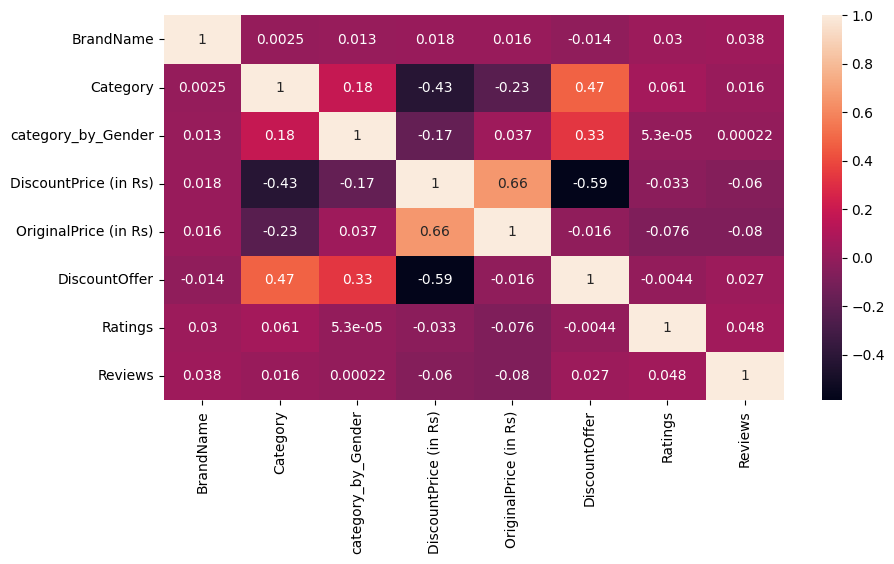

In [67]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)
plt.show()

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [69]:
numeric_cols = data.select_dtypes(include='number').columns
non_numeric_cols = data.select_dtypes(exclude='number').columns

In [70]:
sc=StandardScaler()

In [71]:
scaled_numeric_data = sc.fit_transform(data[numeric_cols])

# Convert the scaled numeric data back to a DataFrame
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols, index=data.index)

# Combine the scaled numeric data with the non-numeric data
data_scaled = pd.concat([scaled_numeric_df, data[non_numeric_cols]], axis=1)

In [72]:
data

,BrandName,Category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,1453,0,0,roadster men navy blue slim fit mid rise clean...,824,1499,45.030020,"28, 30, 32, 34, 36",3.9,999.0
1,937,0,0,locomotive men black white solid slim fit tra...,517,1149,55.004352,"S, M, L, XL",4.0,999.0
2,1453,6,0,roadster men navy white black geometric print...,629,1399,55.039314,"38, 40, 42, 44, 46, 48",4.3,999.0
3,1971,3,1,zivame women black saree shapewear zi3023core0...,893,1295,31.042471,"S, M, L, XL, XXL",4.2,999.0
4,1453,7,1,roadster women white solid v neck pure cotton ...,0,599,100.000000,"XS, S, M, L, XL",4.2,999.0
...,...,...,...,...,...,...,...,...,...,...
526559,672,7,1,hm women beige oversized cashmere jumper,0,9999,100.000000,"XS, S, M, L",NaN,NaN
526560,672,7,1,hm women black water repellent parka jacket,0,9999,100.000000,"XS, S, M, L, XL",NaN,NaN
526561,3,7,1,250 designs blue lace sheath dress,0,9999,100.000000,"S, M, L, XL, XXL",NaN,NaN
526562,1103,7,1,masaba women yellow printed a line dress,0,9999,100.000000,"XS, S, M, L, XL",NaN,NaN


In [73]:
numeric_data_scaled = data_scaled.select_dtypes(include='number')

In [77]:
from sklearn.impute import SimpleImputer

In [78]:
if np.any(np.isnan(numeric_data_scaled)):
    # Impute missing values with mean
    imputer = SimpleImputer(strategy='mean')
    numeric_data_scaled = imputer.fit_transform(numeric_data_scaled)

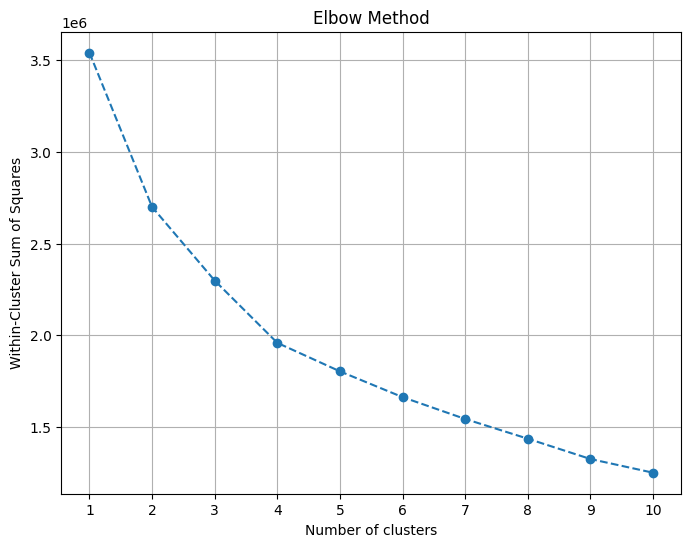

In [82]:
wcss_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(numeric_data_scaled)
    wcss_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_list, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [83]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)

In [87]:
y_predict=kmeans.fit_predict(numeric_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


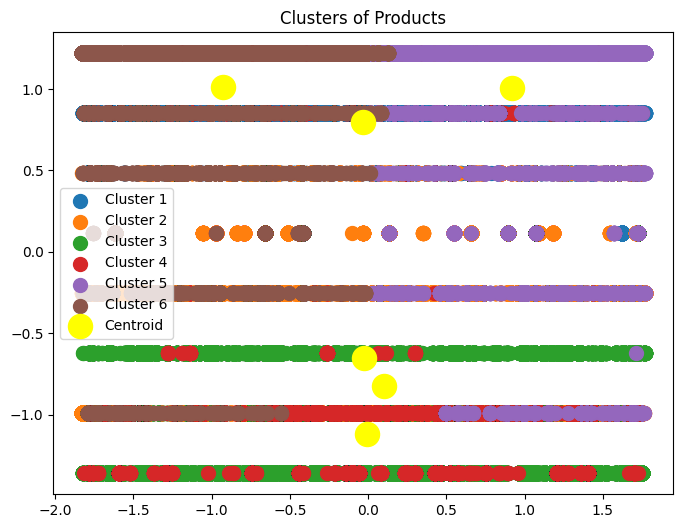

In [92]:


plt.figure(figsize=(8, 6))

# Plot each cluster separately
for cluster_label in np.unique(y_predict):
    plt.scatter(numeric_data_scaled[y_predict == cluster_label, 0],
                numeric_data_scaled[y_predict == cluster_label, 1],
                s=100, label=f'Cluster {cluster_label + 1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroid')

plt.title('Clusters of Products')
plt.legend()
plt.show()
